# Dataset Description

#### This dataset contains information about student performance in Portugese in two different secondary schools. The dataset includes student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. The attribute information can be seen below:
* school: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex: student's sex (binary: 'F' - female or 'M' - male)
* age: student's age (numeric: from 15 to 22)
* address: student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2- 5th to 9th grade 3-secondary education or 4-higher education)
* Fedu: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2- 5th to 9th grade, 3 - secondary education or 4- higher education)
* Mjob: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian: student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures: number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup: extra educational support (binary: yes or no)
* famsup: family educational support (binary: yes or no)
* paid: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities: extra-curricular activities (binary: yes or no)
* nursery: attended nursery school (binary: yes or no)
* higher: wants to take higher education (binary: yes or no)
* internet: Internet access at home (binary: yes or no)
* romantic: with a romantic relationship (binary: yes or no)
* famrel: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime: free time after school (numeric: from 1 - very low to 5 - very high)
* goout: going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health: current health status (numeric: from 1 - very bad to 5 - very good)
* absences: number of school absences (numeric: from 0 to 93)
* G1: first period grade (numeric: from 0 to 20)
* G2: second period grade (numeric: from 0 to 20)
* G3: final grade (numeric: from 0 to 20, output target)

# Data Cleaning and Preparation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset
df = pd.read_csv('student-por.csv')

In [3]:
#first five rows
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
# description of numerical columns
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [6]:
#description of categorical columns
df.describe(include = 'all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649,649,649.000000,649,649,649,649.000000,649.000000,649,649,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,423,383,NaN,452,457,569,NaN,NaN,258,367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.744222,NaN,NaN,NaN,2.514638,2.306626,NaN,NaN,...,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,NaN,NaN,1.218138,NaN,NaN,NaN,1.134552,1.099931,NaN,NaN,...,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


In [7]:
# datatype of each feature of the dataframe
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
#check for missing values
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [9]:
# numerical columns
df.select_dtypes(include='int')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10


In [10]:
# categorial columns
df.select_dtypes(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no
645,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,no,no,yes,yes,yes,no
646,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no
647,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no


In [11]:
# check for dupicated values
df.duplicated().any()

False

In [12]:
# unique values in the failures column
df['failures'].unique()

array([0, 3, 1, 2], dtype=int64)

In [13]:
# list of columns in dataframe
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [14]:
# renaming columns
new_names = {'famsize':'fam_size','Pstatus': 'p_status',
             'Medu':'m_edu','Fedu':'f_edu','Mjob':'m_job',
             'Fjob':'f_job','traveltime':'travel_time',
             'studytime':'study_time','schoolsup':'school_sup',
             'famrel':'fam_rel','famsup':'fam_sup','freetime':'free_time',
             'goout':'go_out','Dalc':'D_alc','Walc':'W_alc'}

df.rename(columns=new_names,inplace=True)
df.columns

Index(['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu',
       'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time',
       'study_time', 'failures', 'school_sup', 'fam_sup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'fam_rel', 'free_time',
       'go_out', 'D_alc', 'W_alc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [15]:
# list of categorical columns in the dataframe
df.select_dtypes(include='object').columns.tolist()

['school',
 'sex',
 'address',
 'fam_size',
 'p_status',
 'm_job',
 'f_job',
 'reason',
 'guardian',
 'school_sup',
 'fam_sup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [16]:
# list of integer columns in the dataframe
df.select_dtypes(include='int').columns.tolist()

['age',
 'm_edu',
 'f_edu',
 'travel_time',
 'study_time',
 'failures',
 'fam_rel',
 'free_time',
 'go_out',
 'D_alc',
 'W_alc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [17]:
df.head()

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,fam_rel,free_time,go_out,D_alc,W_alc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [18]:
# averaging the grades G1,G2,G3 assigning values to a new column
df['avg_grade'] = (df['G1']+df['G2']+df['G3'])/3

In [19]:
df

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,free_time,go_out,D_alc,W_alc,health,absences,G1,G2,G3,avg_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,10.333333
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,15.333333
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,10.666667
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,10.000000


<AxesSubplot:xlabel='avg_grade'>

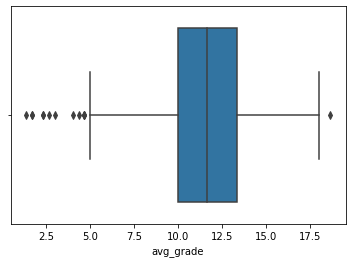

In [20]:
# boxplot of the average grade column
sns.boxplot(x = df['avg_grade'])

In [21]:
# Calculate the IQR (Interquartile Range)
Q1 = df['avg_grade'].quantile(0.25)
Q3 = df['avg_grade'].quantile(0.75)
IQR = Q3 - Q1

In [22]:
# Identify the outliers
outliers = df[(df['avg_grade'] < (Q1 - 1.5 * IQR)) | (df['avg_grade'] > (Q3 + 1.5 * IQR))]
print(outliers)

    school sex  age address fam_size p_status  m_edu  f_edu     m_job  \
338     GP   F   17       R      LE3        T      3      1  services   
440     MS   M   16       U      GT3        T      1      1   at_home   
563     MS   M   17       U      GT3        T      2      2     other   
567     MS   M   18       R      GT3        T      3      2  services   
583     MS   F   18       R      GT3        T      2      2     other   
597     MS   F   18       R      GT3        T      2      2   at_home   
603     MS   F   18       R      LE3        A      4      2   teacher   
605     MS   F   19       U      GT3        T      1      1   at_home   
610     MS   F   19       R      GT3        A      1      1   at_home   
626     MS   F   18       R      GT3        T      4      4     other   
637     MS   M   18       R      GT3        T      2      1     other   
639     MS   M   19       R      GT3        T      1      1     other   
640     MS   M   18       R      GT3        T      

#### we won't drop outliers because the students with those grades weren't absent. They didn't perform well and got low grades